In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#   Load Dataset
def load_data(train_path, test_path, target_column):
    """Loads train and test datasets and separates features and target."""
    df_train = pd.read_csv("./Train.csv")
    df_test = pd.read_csv("./Test.csv")

    if target_column not in df_train.columns or target_column not in df_test.columns:
        raise ValueError(f"Target column '{target_column}' not found in one of the datasets!")

    X_train = df_train.drop(columns=[target_column])
    y_train = df_train[target_column]

    X_test = df_test.drop(columns=[target_column])
    y_test = df_test[target_column]

    return X_train, y_train, X_test, y_test







In [2]:
#   Preprocess Data (Handle Categorical Features & Standardization)
def preprocess_data(X_train, X_test):
    """Handles categorical variables, standardizes features, and aligns train & test sets."""
    # Convert categorical features (if any)
    X_train = pd.get_dummies(X_train)
    X_test = pd.get_dummies(X_test)

    # Align train and test features (for missing category issues)
    X_train, X_test = X_train.align(X_test, join='inner', axis=1)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled


In [3]:
#  Apply PCA
def apply_pca(X_train_scaled, X_test_scaled, variance=0.95):
    """Applies PCA to reduce dimensionality while retaining specified variance."""
    pca = PCA(n_components=variance)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    return X_train_pca, X_test_pca


In [4]:
#  Train & Evaluate Models
def train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test):
    """Trains and evaluates models, returning accuracy scores."""
    models = {
        "Radial Basis Function (RBF)": SVC(kernel='rbf', random_state=42),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(n_neighbors=5),
        "Support Vector Machine (SVM)": SVC(kernel='linear', random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
    }

    accuracy_scores = {}
    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        y_pred = model.predict(X_test_pca)
        accuracy_scores[name] = accuracy_score(y_test, y_pred)

    return accuracy_scores


In [5]:
#  Visualize Results
def plot_results(accuracy_scores):
    """Plots a bar graph to compare model performances."""
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
    plt.xlabel("Machine Learning Models")
    plt.ylabel("Accuracy Score")
    plt.title("Comparison of Model Performance After PCA")
    plt.xticks(rotation=30, ha="right")
    plt.ylim(0, 1)
    plt.show()


Radial Basis Function (RBF): 0.8263
K-Nearest Neighbors (KNN): 0.8519
Support Vector Machine (SVM): 0.8062
Random Forest: 0.9525
Decision Tree: 0.8903


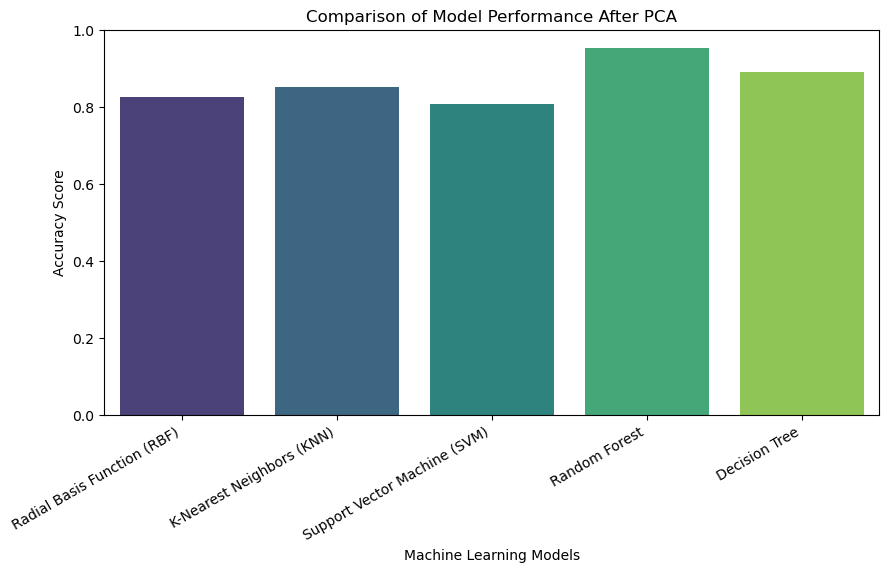

In [6]:
#  Main Execution
if __name__ == "__main__":
    train_file_path = "/mnt/data/Train.csv"
    test_file_path = "/mnt/data/Test.csv"
    target_column = "class"  # Update this if needed

    # Load data
    X_train, y_train, X_test, y_test = load_data(train_file_path, test_file_path, target_column)

    # Preprocess data
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

    # Apply PCA
    X_train_pca, X_test_pca = apply_pca(X_train_scaled, X_test_scaled)

    # Train & Evaluate Models
    accuracy_scores = train_and_evaluate(X_train_pca, X_test_pca, y_train, y_test)

    # Print accuracy scores
    for model, acc in accuracy_scores.items():
        print(f"{model}: {acc:.4f}")

    # Plot results
    plot_results(accuracy_scores)
